In [1]:
# -*- coding: utf-8 -*-
# using different kinds of algorithm to train model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn import svm #SVM
from sklearn.linear_model import LogisticRegression #LR: logic regression
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB # GaussianNB/MultinomialNB/BernoulliNB
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.ensemble import  AdaBoostClassifier #AdaBoost
# from xgboost import XGBClassifier #XGBoost
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  
import matplotlib.pyplot as plt

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


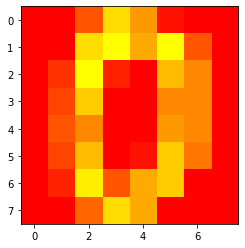

1347
64
86208
LR准确率: 0.9600
CART决策树准: 0.8533


/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA: 0.9378
Bayies: 0.8311
SVM: 0.9867
KNN: 0.9756
AdaBoost: 0.9667


In [2]:
# load data
digits = load_digits()
data = digits.data
# check data
print(data.shape)
# check the first image
print(digits.images[0])
# the target of the first image
print(digits.target[0])

# show the first image
# change the color for the image
plt.autumn()

# put image which is waiting shown
plt.imshow(digits.images[0])
plt.show()

# splite date with 25% for testing, 75% for training
train_x, test_x, train_y, test_y = train_test_split(data, digits.target, test_size=0.25, random_state=33)
# useless
# print(train_x.max())

# print((train_x>1).sum())

print(train_x.shape[0])
print(train_x.shape[1])
print("================")
print(train_x.shape[0]*train_x.shape[1])
# Z-Score
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(train_x)
# ?
test_ss_x = ss.transform(test_x)

# LR classifier
lr = LogisticRegression(solver='liblinear', multi_class='auto') #数据集比较小，使用liblinear，数据集大使用 sag或者saga
lr.fit(train_ss_x, train_y)
predict_y=lr.predict(test_ss_x)
print('LR准确率: %0.4lf' % accuracy_score(predict_y, test_y))

# CART, decision tree classifier
model = DecisionTreeClassifier()
model.fit(train_ss_x,train_y)
predict_y=model.predict(test_ss_x)
print('CART决策树准: %0.4lf' %accuracy_score(predict_y,test_y))

# LDA classifier
model = LinearDiscriminantAnalysis(n_components=2)
model.fit(train_ss_x,train_y)
predict_y=model.predict(test_ss_x)
print('LDA: %0.4lf' %accuracy_score(predict_y,test_y))

# bayies classifier
model = GaussianNB()
model.fit(train_x,train_y)
predict_y=model.predict(test_x)
print('Bayies: %0.4lf' %accuracy_score(predict_y,test_y))

# SVM classifier
model = svm.SVC(kernel='rbf', C=1.0, gamma='auto')
model.fit(train_ss_x,train_y)
predict_y=model.predict(test_ss_x)
print('SVM: %0.4lf' %accuracy_score(predict_y,test_y))

# KNN classifier
model = KNeighborsClassifier()
model.fit(train_ss_x,train_y)
predict_y=model.predict(test_ss_x)
print('KNN: %0.4lf' %accuracy_score(predict_y,test_y))

# AdaBoost classifier
# weak classifier
dt_stump = DecisionTreeClassifier(max_depth=5,min_samples_leaf=1)
dt_stump.fit(train_ss_x, train_y)
#dt_stump_err = 1.0-dt_stump.score(test_x, test_y)
# set AdaBoost echo times
n_estimators=500
model = AdaBoostClassifier(base_estimator=dt_stump,n_estimators=n_estimators)
model.fit(train_ss_x,train_y)
predict_y=model.predict(test_ss_x)
print('AdaBoost: %0.4lf' %accuracy_score(predict_y,test_y))

# XGBoost classifier
# model = XGBClassifier()
# model.fit(train_ss_x,train_y)
# predict_y=model.predict(test_ss_x)
# print('XGBoost: %0.4lf' %accuracy_score(predict_y,test_y))

